## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Explore data

for c in study_results.columns:
    print("---- %s ---" % c)
    print(study_results[c].value_counts())
    
    
# for col in mouse_metadata:
#         print(col, mouse_metadata[col].unique())



---- Mouse ID ---
g989    13
b742    10
e476    10
a492    10
g497    10
        ..
v199     1
n482     1
h428     1
f932     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64
---- Timepoint ---
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64
---- Tumor Volume (mm3) ---
45.000000    250
48.009190      1
54.041333      1
69.265747      1
42.368692      1
            ... 
44.006257      1
35.569399      1
52.068486      1
59.011728      1
29.128472      1
Name: Tumor Volume (mm3), Length: 1644, dtype: int64
---- Metastatic Sites ---
0    793
1    590
2    274
3    148
4     88
Name: Metastatic Sites, dtype: int64


In [3]:
# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, on = "Mouse ID", how = "outer")
merged_df
# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl = merged_df[merged_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mouse = ", ".join(dupl['Mouse ID'].unique()) #get list of duplicated mouse IDs
cleanDF = merged_df[merged_df["Mouse ID"] != dup_mouse]


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleanDF['Mouse ID'].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = cleanDF.groupby('Drug Regimen')

summaryDF = drug_group['Tumor Volume (mm3)'].describe().reset_index()

medianDF = drug_group['Tumor Volume (mm3)'].median().reset_index()
summaryDF = summaryDF.merge(medianDF, on = 'Drug Regimen', how = 'outer').rename(columns = {'Tumor Volume (mm3)' : 'median'})

varianceDF = drug_group['Tumor Volume (mm3)'].var().reset_index()
summaryDF = summaryDF.merge(varianceDF, on = 'Drug Regimen', how = 'outer').rename(columns = {'Tumor Volume (mm3)' : 'variance'})

semDF = drug_group['Tumor Volume (mm3)'].sem().reset_index()
summaryDF = summaryDF.merge(semDF, on = 'Drug Regimen', how = 'outer').rename(columns = {'Tumor Volume (mm3)' : 'SEM'})

summaryDF


,Drug Regimen,count,mean,std,min,25%,50%,75%,max,median,variance,SEM
0,Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,41.557809,24.947764,0.329346
1,Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,51.776157,39.290177,0.469821
2,Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,51.820584,43.128684,0.492236
3,Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,53.698743,68.553577,0.603860
4,Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,52.509285,66.173479,0.596466
5,Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,52.288934,61.168083,0.581331
6,Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,50.446266,43.852013,0.544332
7,Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,40.673236,23.486704,0.320955
8,Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,52.431737,59.450562,0.573111
9,Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432,51.818479,48.533355,0.516398


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Unique Mice')

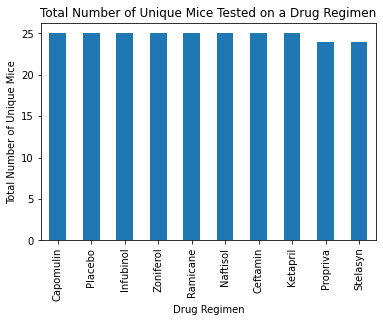

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
'''
The way this question is phrased indicates that it's looking for the total number of unique mice (248)
that were administered each of the 10 drugs. However the solution charts seem to indicate that 
it was actually looking for the number of times each mouse was administered a drug. If this is the case,
the question should be reworded. My solution assumes the former interpretation. 
'''

#prep data
plot_dat = cleanDF.drop_duplicates(subset = ['Mouse ID', 'Drug Regimen'], keep = 'first')['Drug Regimen'].value_counts()

#plot
plot_dat.plot(kind = "bar", title = "Total Number of Unique Mice Tested on a Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Unique Mice")

Text(0, 0.5, 'Total Number of Unique Mice')

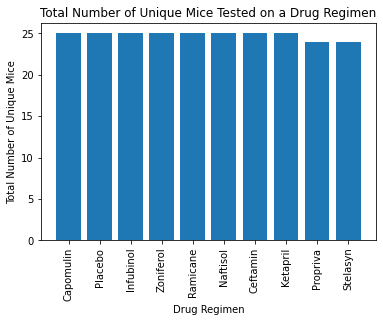

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(plot_dat.index, plot_dat.values)
plt.xticks(plot_dat.index, rotation = "vertical")
plt.title("Total Number of Unique Mice Tested on a Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Unique Mice")


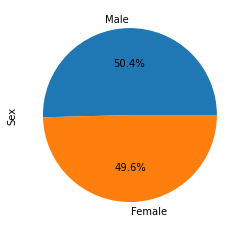

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#prep data
sex_dat = cleanDF.drop_duplicates(subset = ['Mouse ID', 'Drug Regimen'], keep = 'first')['Sex'].value_counts()

#plot
sex_dat.plot.pie(y = sex_dat.values, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ffde9f623a0>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

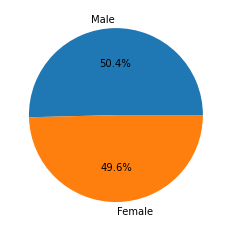

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_dat.values, labels = ["Male", "Female"], autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Method #1:
final_tumorvol = cleanDF.sort_values(by = ['Mouse ID', 'Timepoint']).drop_duplicates(subset = ['Mouse ID'], keep = "last")
final_tumorvol = final_tumorvol[final_tumorvol["Drug Regimen"].isin(treatment_list)]

# Method #2:
# Start by getting the last (greatest) timepoint for each mouse
mouse_group = cleanDF.groupby(['Mouse ID'])
max_timepoint = mouse_group['Timepoint'].max().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumorvol2 = max_timepoint.merge(cleanDF, on = ['Mouse ID', 'Timepoint'], how = 'left')
final_tumorvol2 = final_tumorvol2[final_tumorvol2["Drug Regimen"].isin(treatment_list)]


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list #from previous cell

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


#initialize DF
outlier_combined = pd.DataFrame()

#loop through each drug
for drugs in treatment_list:
    #filter on drug
    drugfilter_df = final_tumorvol.query("`Drug Regimen` == @drugs")
    
    #calculate upper and lower fence for each drug
    q1, q3 = np.percentile(drugfilter_df['Tumor Volume (mm3)'], [25, 75])
    iqr = q3 - q1
    upperfence, lowerfence = [q3 + 1.5 * iqr, q1 - 1.5 * iqr]

    #find outliers and add to DF
    outlier_df = drugfilter_df.query("`Tumor Volume (mm3)` < @lowerfence or `Tumor Volume (mm3)` > @upperfence")
    outlier_combined = outlier_combined.append(outlier_df)
    
outlier_combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


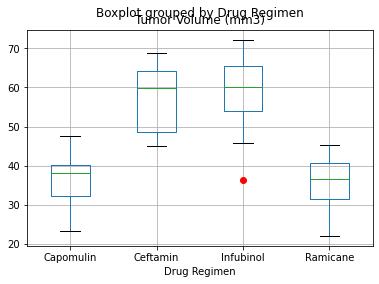

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#define flierprop argument to highlight outlier
flierprops = dict(marker = 'o', markerfacecolor = 'r', markersize = 6,
                  linestyle = 'none', markeredgecolor = 'r')

# plot:
final_tumorvol.boxplot(column = 'Tumor Volume (mm3)', by = 'Drug Regimen',
                      flierprops = flierprops)

## Line and Scatter Plots

Please select a mouse ID from list: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157'] -> i557


Text(0.5, 1.0, 'Tumor Volume by Timepoint for Mouse ID: i557')

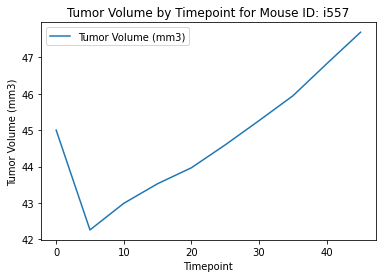

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_mice = cleanDF.query("`Drug Regimen` == 'Capomulin'")['Mouse ID'].unique()

while True:
    mouse = input(f"Please select a mouse ID from list: {capo_mice} -> ")
    if mouse in capo_mice:
        break
    else:
        print("Please select a mouse ID from the list.")
        continue

linescatterDF = cleanDF.query("`Drug Regimen` == 'Capomulin' & `Mouse ID` == @mouse")
linescatterDF.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)')
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume by Timepoint for Mouse ID: {mouse}")

Text(0.5, 1.0, 'Average Tumor Volume by Weight of Mice for Capomulin')

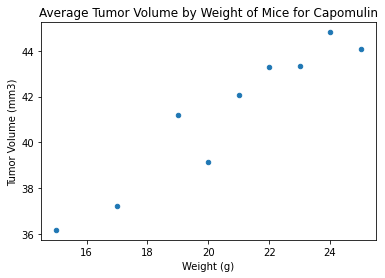

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumorvol = cleanDF.query("`Drug Regimen` == 'Capomulin'").groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
avg_tumorvol = avg_tumorvol.reset_index()
avg_tumorvol.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.title("Average Tumor Volume by Weight of Mice for Capomulin")

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(st.linregress(x = avg_tumorvol['Weight (g)'], y = avg_tumorvol['Tumor Volume (mm3)']))
print(st.pearsonr(x = avg_tumorvol['Weight (g)'], y = avg_tumorvol['Tumor Volume (mm3)']))

LinregressResult(slope=0.894772609734063, intercept=22.764229983591896, rvalue=0.950524396185527, pvalue=8.449451040646223e-05, stderr=0.1105278286274132)
(0.9505243961855269, 8.449451040646294e-05)


In [21]:
#insights
#1 There appears to be a positive correlation between relationship between weight(g) and tumor volume for the mice that were given Capomulin
#2 There is only one outlier (1.5IQR) in tumor volume in the data set and it's with the drug Infubinol.  
#3 There's an even distribution of mice between drugs and gender. 